In [1]:
! wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/t9n68ykfk3-1.zip

--2021-05-08 02:44:29--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/t9n68ykfk3-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.30.184
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.30.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428268610 (2.3G) [application/octet-stream]
Saving to: ‘t9n68ykfk3-1.zip’

t9n68ykfk3-1.zip    100%[===================>]   2.26G  29.8MB/s    in 80s     

2021-05-08 02:45:50 (28.9 MB/s) - ‘t9n68ykfk3-1.zip’ saved [2428268610/2428268610]



In [7]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: human_activity_sensor_data_in_home_environment.zip  


In [1]:
ls

dataset.zip
human_activity_raw_sensor_data/
human_activity_sensor_data_in_home_environment.zip
sample_data/


In [9]:
!unzip human_activity_sensor_data_in_home_environment.zip

Archive:  human_activity_sensor_data_in_home_environment.zip
   creating: human_activity_raw_sensor_data/
  inflating: human_activity_raw_sensor_data/sensor_sample_float.csv  
  inflating: human_activity_raw_sensor_data/sensor.csv  
  inflating: human_activity_raw_sensor_data/sensor_sample_int.csv  


In [1]:
import pandas as pd

In [2]:
sensor = pd.read_csv('/content/human_activity_raw_sensor_data/sensor.csv')

In [3]:
sensor.shape

(24, 4)

In [4]:
sensor

,sensor_id,node_id,type,name
0,5894,541150,INT,corridor/ambience/motion
1,5895,541151,INT,bathroom/ambience/motion
2,7125,542381,INT,bathroom/ambience/light
3,5896,541152,INT,bedroom/bed/pressure
4,6127,541383,INT,livingroom/tv/light
5,6220,541444,INT,balcon/door/contact
6,6253,541509,INT,kitchen/fridge/contact
7,6632,541888,FLOAT,kitchen/coffeemaker/current
8,6633,541889,FLOAT,kitchen/sandwichmaker/current
9,6634,541890,FLOAT,kitchen/dishwasher/current


In [5]:
sensor_float = pd.read_csv('/content/human_activity_raw_sensor_data/sensor_sample_float.csv')

In [6]:
sensor_float.shape

(60479847, 4)

In [94]:
sensor_float_small = sensor_float[:1000000]

In [95]:
sensor_float_small

,value_id,sensor_id,timestamp,value
0,315318,6222,2020-02-26 11:22:3,17.78
1,315319,6223,2020-02-26 11:22:3,26.51
2,315320,6223,2020-02-26 19:36:3,27.27
3,315321,6222,2020-02-26 19:36:3,51.52
4,315322,6223,2020-02-26 19:36:3,27.26
...,...,...,...,...
999995,1583843,6222,2020-03-21 01:15:02.675773,30.17
999996,1583846,6223,2020-03-21 01:15:03.732410,26.76
999997,1583847,6222,2020-03-21 01:15:03.804860,30.17
999998,1583849,6223,2020-03-21 01:15:04.847125,26.76


In [9]:
sensor_float_small['timestamp'] = sensor_float_small['timestamp'].apply(lambda x:  x[:-8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
sensor_float_small.head()

,value_id,sensor_id,timestamp,value
0,315318,6222,2020-02-26 11:22:3,17.78
1,315319,6223,2020-02-26 11:22:3,26.51
2,315320,6223,2020-02-26 19:36:3,27.27
3,315321,6222,2020-02-26 19:36:3,51.52
4,315322,6223,2020-02-26 19:36:3,27.26


In [97]:
x= {}
y = []

for i in range(len(sensor_float_small)):
    data = sensor_float_small.iloc[i]
    # print(data)
    # print(data['timestamp'])
    if data['timestamp'] not in x:
        x[data['timestamp']] = []
    x[data['timestamp']].append(data['value'])



In [ ]:
x

In [98]:
len(x)

908151

In [90]:
x1 = []
# low = 100000
total = []
for k in x:
    if len(x[k])>=8:
        x[k].sort()
        x1.append(x[k][:8])
        total.append(sum(x[k][:8]))

In [ ]:
x1

In [110]:
len(x1)

5936

In [101]:
len(total)

7420

(array([1.081e+03, 2.787e+03, 2.326e+03, 7.040e+02, 3.530e+02, 1.040e+02,
        3.900e+01, 1.800e+01, 6.000e+00, 2.000e+00]),
 array([131.02 , 149.409, 167.798, 186.187, 204.576, 222.965, 241.354,
        259.743, 278.132, 296.521, 314.91 ]),
 <a list of 10 Patch objects>)

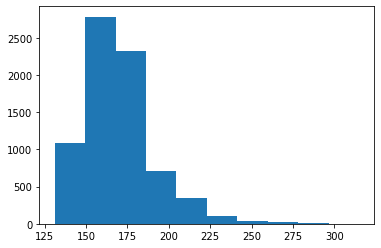

In [102]:
import matplotlib.pyplot as plt
plt.hist(total, bins=10)

In [103]:
limit = 241

In [104]:
y = [int(t>limit) for t in total]

In [105]:
sum(y)

69

In [111]:
len(y)

5936

In [109]:
x_test = x1[int(7420*0.8):]
y_test = y[int(7420*0.8):]

x1 = x1[:int(7420*0.8)]
y = y[:int(7420*0.8)]

##Model 1

In [69]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(x1, y, epochs=25)

Epoch 1/25
232/232 [==============================] - 1s 1ms/step - loss: 0.1344 - accuracy: 0.9913
Epoch 2/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9922
Epoch 3/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9917
Epoch 4/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9901
Epoch 5/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9916
Epoch 6/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9906
Epoch 7/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9916
Epoch 8/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9901
Epoch 9/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9919
Epoch 10/25
232/232 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9910

##Model 2

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x1, y, epochs=25)

Epoch 1/25
186/186 [==============================] - 1s 1ms/step - loss: 0.0171 - accuracy: 0.9988
Epoch 2/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9991
Epoch 3/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9996
Epoch 4/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9996
Epoch 5/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9989
Epoch 6/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9985
Epoch 7/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9991
Epoch 8/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9983
Epoch 9/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9994
Epoch 10/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.9989

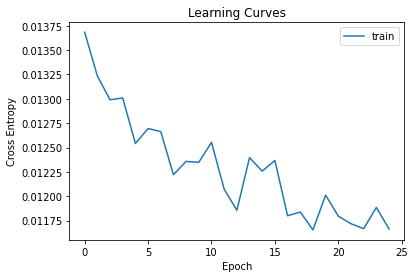

In [129]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [131]:
pred = model.predict_classes(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1421,    0],
       [  63,    0]])

In [132]:
accuracy = sum([y_test[i]==pred[i] for i in range(len(pred))])/len(pred)
accuracy

array([0.95754717])

##Model 3

In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x1, y, epochs=25)

Epoch 1/25
186/186 [==============================] - 1s 1ms/step - loss: 0.0386 - accuracy: 0.9988
Epoch 2/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9995
Epoch 3/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9988
Epoch 4/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9980
Epoch 5/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9990
Epoch 6/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9984
Epoch 7/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9993
Epoch 8/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9990
Epoch 9/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9997
Epoch 10/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9992

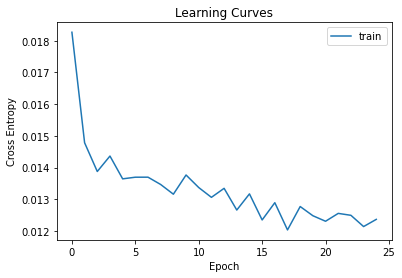

In [123]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [125]:
pred = model.predict_classes(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1421,    0],
       [  63,    0]])

In [127]:
accuracy = sum([y_test[i]==pred[i] for i in range(len(pred))])/len(pred)
accuracy

array([0.95754717])

##Model 4 - class weights

In [112]:
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
# model.add(Dense())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

class_weights = {0:1, 1:5}

history = model.fit(x1, y, epochs=25, class_weight=class_weights)

Epoch 1/25
186/186 [==============================] - 1s 1ms/step - loss: 0.0630 - accuracy: 0.9958
Epoch 2/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.9990
Epoch 3/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9990
Epoch 4/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9992
Epoch 5/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9994
Epoch 6/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9991
Epoch 7/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9991
Epoch 8/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9987
Epoch 9/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9985
Epoch 10/25
186/186 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9993

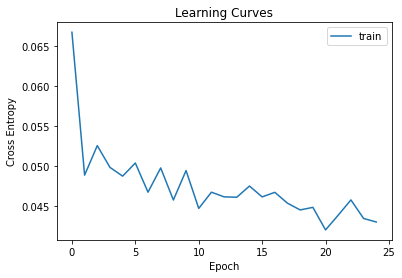

In [113]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [117]:
pred = model.predict_classes(x_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1421,    0],
       [  63,    0]])

In [135]:
accuracy = sum([y_test[i]==pred[i] for i in range(len(pred))])/len(pred)

In [121]:
accuracy

array([0.95754717])

##Decision tree

In [133]:
from sklearn import tree

In [141]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1, y)

In [142]:
pred = model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1421,    0],
       [  63,    0]])

In [143]:
accuracy = sum([y_test[i]==pred[i] for i in range(len(pred))])/len(pred)

In [144]:
accuracy

array([0.95754717])

[Text(133.92000000000002, 190.26, 'X[6] <= 36.2\ngini = 0.002\nsamples = 5936\nvalue = [5930, 6]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 5929\nvalue = [5929, 0]'),
 Text(200.88000000000002, 135.9, 'X[7] <= 38.545\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(133.92000000000002, 81.53999999999999, 'X[1] <= 27.29\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

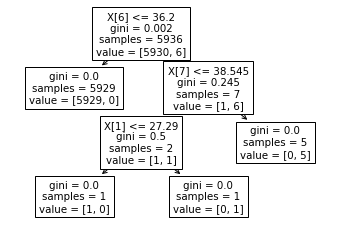

In [145]:
tree.plot_tree(clf) 